# 1 Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# 2 Import & Read Data 

In [2]:
df = pd.read_csv(r"C:\Users\DELL-PC\Downloads\archive (5)\breast-cancer-data.csv")

In [3]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'


In [4]:
df.tail()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'
285,50-59',ge40',40-44',0-2',no',3',left',right_up',no',no-recurrence-events'


df.shape

# 3 EDA (Exploratry data analysis)

## 3.1 understand the data 

In [5]:
df.nunique()

age             6
menopause       3
tumer-size     11
inv-nodes       7
node-caps       2
deg-malig       3
breast          2
breast-quad     5
irradiate       2
class           2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


**ALL variable are categorical**

## 3.2 Find missing value 

In [7]:
df.isnull().sum()/len(df)*100

age            0.000000
menopause      0.000000
tumer-size     0.000000
inv-nodes      0.000000
node-caps      2.797203
deg-malig      0.000000
breast         0.000000
breast-quad    0.349650
irradiate      0.000000
class          0.000000
dtype: float64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()/len(df)*100

age            0.0
menopause      0.0
tumer-size     0.0
inv-nodes      0.0
node-caps      0.0
deg-malig      0.0
breast         0.0
breast-quad    0.0
irradiate      0.0
class          0.0
dtype: float64

## 3.3 Statstical summary 

In [10]:
df.describe()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
count,277,277,277,277,277,277,277,277,277,277
unique,6,3,11,7,2,3,2,5,2,2
top,50-59',premeno',30-34',0-2',no',2',left',left_low',no',no-recurrence-events'
freq,91,149,57,209,221,129,145,106,215,196


## 3.4 Correlation

**Correlation is a statistic that measures the degree to which two variables move with each other.  Since all the independent variables are categorical variables, we skip this step**

# 4  Visualization

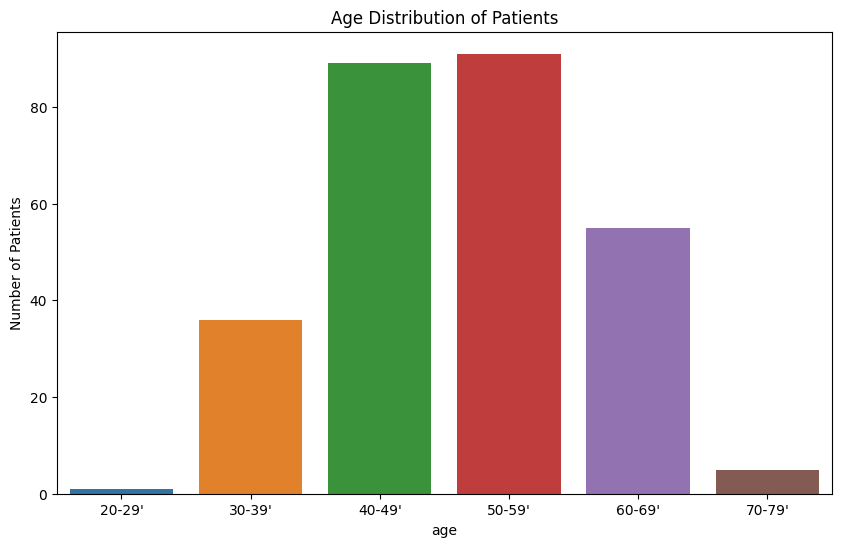

In [11]:
# count plot for age variable 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))
plt.title('Age Distribution of Patients')
plt.ylabel('Number of Patients')
plt.show()

**Above output we can clearly see that age group of 40-59 has most breast cancer**

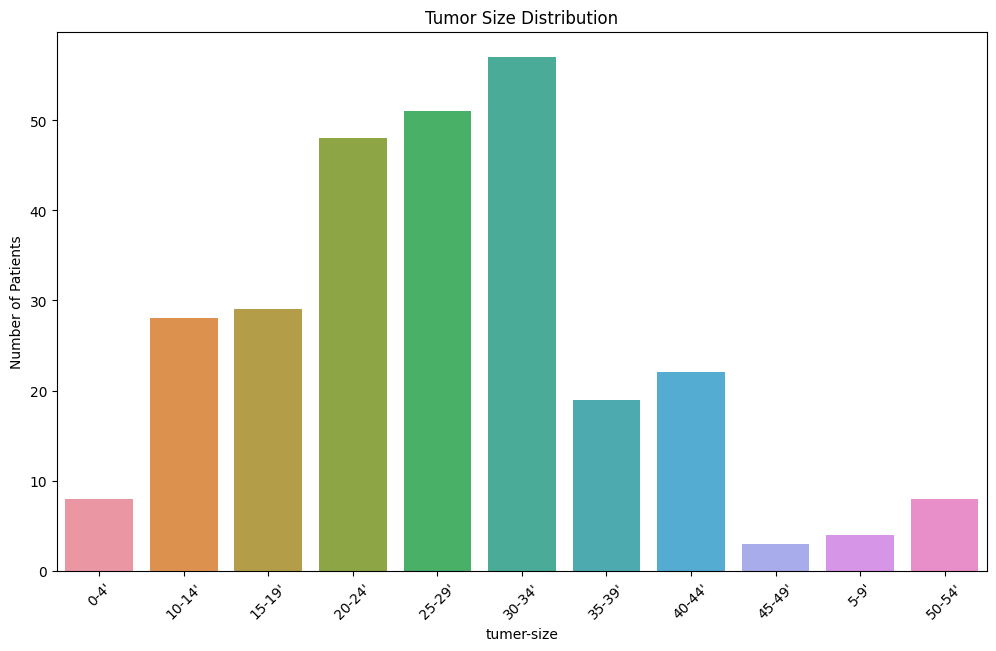

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='tumer-size',order=sorted(df['tumer-size'].unique()))
plt.title('Tumor Size Distribution')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

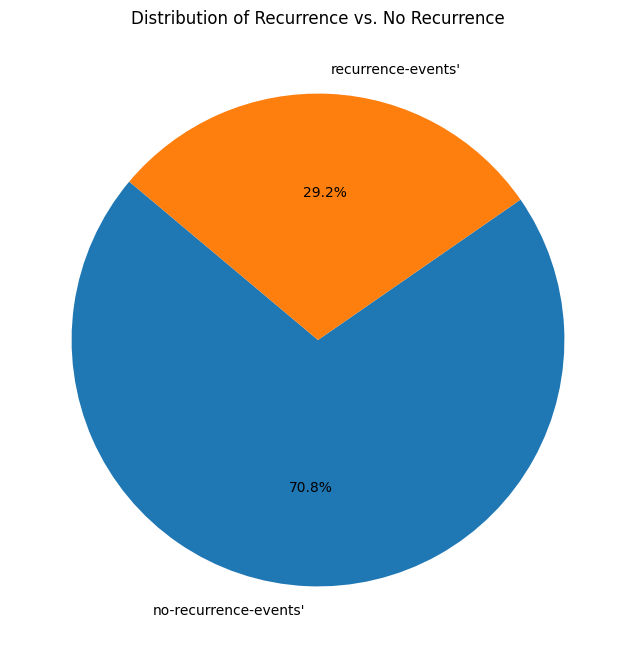

In [13]:
# pie chart for target variable 
class_counts = df['class'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recurrence vs. No Recurrence')
plt.show()

**70.8% women has no recurrence of cancer after initial treatment**

# 5 Data Preparation/Preprocessing 

 ## 5.1 Encode categorical variables

In [14]:
# Encoding ordinal columns using label encoding
ordinal_columns = ['age', 'tumer-size', 'inv-nodes', 'deg-malig']
label_encoders = {}

for column in ordinal_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
df.head()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,2,premeno',2,0,yes',2,right',left_up',no',recurrence-events'
1,3,ge40',2,0,no',0,right',central',no',no-recurrence-events'
2,3,ge40',6,0,no',1,left',left_low',no',recurrence-events'
3,2,premeno',6,0,yes',2,right',left_low',yes',no-recurrence-events'
4,2,premeno',5,4,yes',1,left',right_up',no',recurrence-events'


In [16]:
# Encoding nominal columns using one-hot encoding

nominal_columns = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiate', 'class']

data = pd.get_dummies(df, columns=nominal_columns, drop_first=True,dtype=int)

In [17]:
data.head()

,age,tumer-size,inv-nodes,deg-malig,menopause_lt40',menopause_premeno',node-caps_yes',breast_right',breast-quad_left_low',breast-quad_left_up',breast-quad_right_low',breast-quad_right_up',irradiate_yes',class_recurrence-events'
0,2,2,0,2,0,1,1,1,0,1,0,0,0,1
1,3,2,0,0,0,0,0,1,0,0,0,0,0,0
2,3,6,0,1,0,0,0,0,1,0,0,0,0,1
3,2,6,0,2,0,1,1,1,1,0,0,0,1,0
4,2,5,4,1,0,1,1,0,0,0,0,1,0,1


## 5.2 Split the data

In [18]:
x= data.drop("class_recurrence-events'",axis=1)
y = data["class_recurrence-events'"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 40)

In [20]:
X_train.shape,X_test.shape

((193, 13), (84, 13))

In [21]:
y_train.value_counts()

class_recurrence-events'
0    144
1     49
Name: count, dtype: int64

### Balance the imbalanced data 

In [22]:
from imblearn.combine import SMOTETomek
sampling = SMOTETomek()

In [23]:
X_train_os,y_train_os = sampling.fit_resample(X_train,y_train)

In [24]:
y_train_os.value_counts()

class_recurrence-events'
0    135
1    135
Name: count, dtype: int64

# 6 Machine Learning Model Evaluations and Predictions

#                             Logistic Regression

In [25]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train,y_train)
accuracy_Lr = Lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_Lr)

Logistic Regression accuracy is : 0.7142857142857143


In [26]:
Lr_pred= Lr_model.predict(X_test)
report = classification_report(y_test,Lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        52
           1       0.79      0.34      0.48        32

    accuracy                           0.71        84
   macro avg       0.74      0.64      0.64        84
weighted avg       0.73      0.71      0.68        84



In [27]:
def CM(Actual,Predicted) :
    cm = sns.heatmap(confusion_matrix(Actual,Predicted),annot = True ,fmt = '.2f',xticklabels=['yes','No'],yticklabels=['yes','No'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return cm 

In [28]:
def ROC_Curve(Actual,Predicted):
    fpr,tpr,thresholds = roc_curve(Actual,Predicted)
    roc = plt.plot(fpr,tpr)
    plt.xlabel('False Possitive Rate')
    plt.ylabel('True Possitive Rate')
    plt.title('ROC CURVE')
    plt.show()
    return roc

<Axes: xlabel='Predicted', ylabel='Actual'>

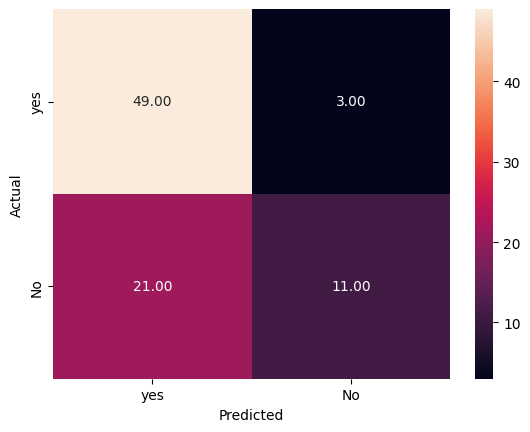

In [29]:
CM(y_test,Lr_pred)

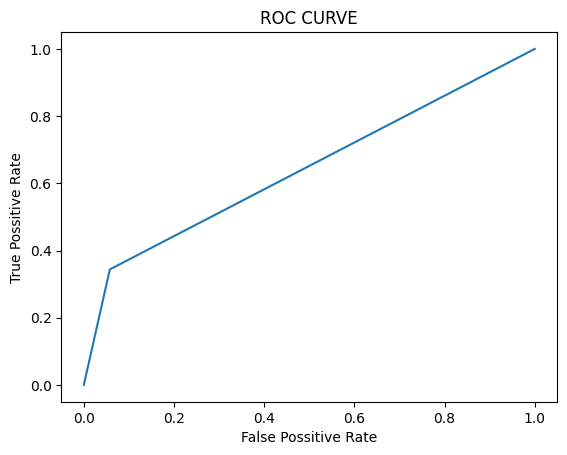

In [30]:
ROC_Curve(y_test,Lr_pred)

# Decision Tree

In [31]:
DT = DecisionTreeClassifier(criterion = 'gini',min_samples_split=20,max_depth=5)
Dt_model = DT.fit(X_train,y_train)
accuracy_Dt = Dt_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_Dt)

Logistic Regression accuracy is : 0.6785714285714286


In [32]:
Dt_y_pred = Dt_model.predict(X_test)
report = classification_report(y_test,Dt_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.94      0.78        52
           1       0.73      0.25      0.37        32

    accuracy                           0.68        84
   macro avg       0.70      0.60      0.58        84
weighted avg       0.69      0.68      0.63        84



<Axes: xlabel='Predicted', ylabel='Actual'>

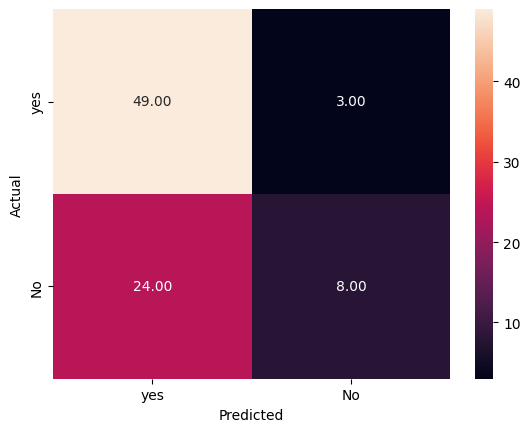

In [33]:
CM(y_test,Dt_y_pred)

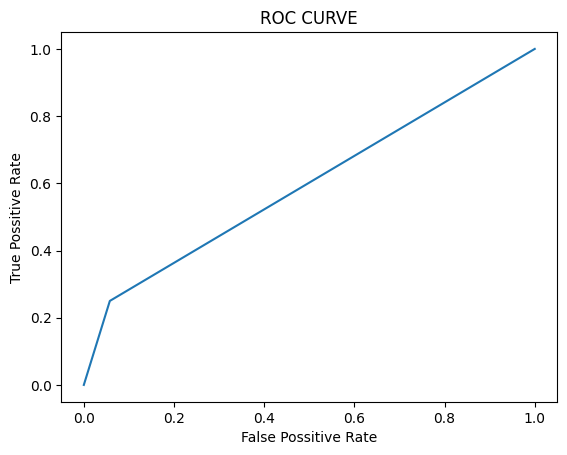

In [34]:
ROC_Curve(y_test,Dt_y_pred)

### Hyperparameter tunning

In [45]:
from sklearn.model_selection import GridSearchCV
dt_param = [{'criterion':['gini','entropy'],'min_samples_split':range(5,20),'max_depth':range(1,5)}]
dt_gs = GridSearchCV(DecisionTreeClassifier(),dt_param,cv=10,scoring='accuracy')
dt_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 5),
                          'min_samples_split': range(5, 20)}],
             scoring='accuracy')

In [46]:
dt_gs.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 5}

In [47]:
dt_gs.best_score_

0.7671052631578947

# Random Forest 

In [38]:
RF = RandomForestClassifier(n_estimators = 200 , criterion = 'gini' , max_depth = 4 , min_samples_split = 13)
RF_model = RF.fit(X_train,y_train)
accuracy_RF = RF_model.score(X_test,y_test)
print("Random Forest accuracy is :",accuracy_RF)

Random Forest accuracy is : 0.6904761904761905


In [39]:
RF_y_pred = RF_model.predict(X_test)
report = classification_report(y_test,RF_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.98      0.80        52
           1       0.88      0.22      0.35        32

    accuracy                           0.69        84
   macro avg       0.77      0.60      0.57        84
weighted avg       0.75      0.69      0.63        84



<Axes: xlabel='Predicted', ylabel='Actual'>

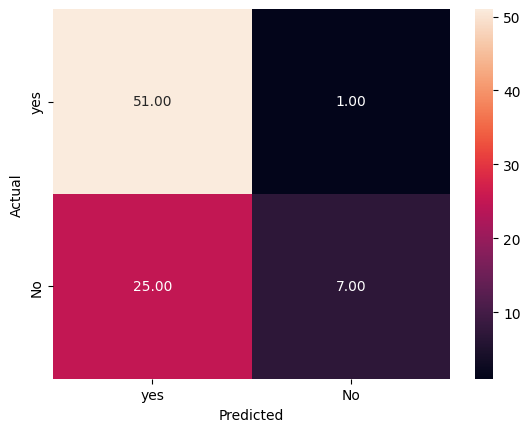

In [40]:
CM(y_test,RF_y_pred)

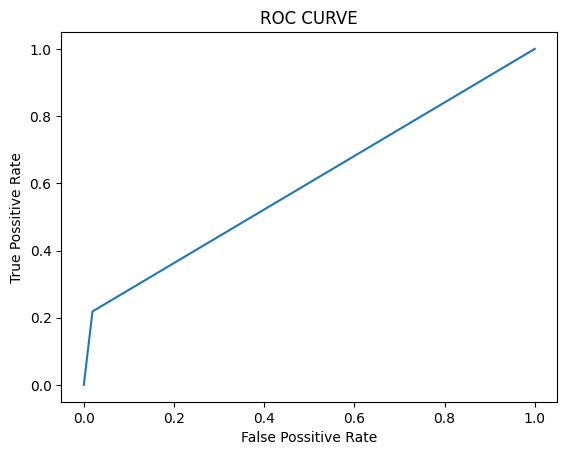

In [41]:
ROC_Curve(y_test,RF_y_pred)

#### Hyperparameter Tunning

In [42]:
# rf_tun =  [{'criterion':['gini', 'entropy'], 'max_depth':[5,10,15], 'min_samples_split': range(1,20), 'n_estimators':range(1,10)}]
# gs_rf = GridSearchCV(RandomForestClassifier(), rf_tun, scoring='accuracy', cv =10)
# gs_rf.fit(X_train, y_train)

In [ ]:
# gs_rf.best_params_

In [ ]:
# gs_rf.best_score_

# SVM (Support vector machine)

In [48]:
svm  = SVC(kernel='poly', C = 0.1)
svm_model = svm.fit(X_train,y_train)
accuracy_svm = svm_model.score(X_test,y_test)
print("SVC accuracy is :",accuracy_svm)

SVC accuracy is : 0.6309523809523809


In [49]:
svm_y_pred = svm_model.predict(X_test)
report = classification_report(y_test,svm_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.94      0.76        52
           1       0.57      0.12      0.21        32

    accuracy                           0.63        84
   macro avg       0.60      0.53      0.48        84
weighted avg       0.61      0.63      0.55        84



<Axes: xlabel='Predicted', ylabel='Actual'>

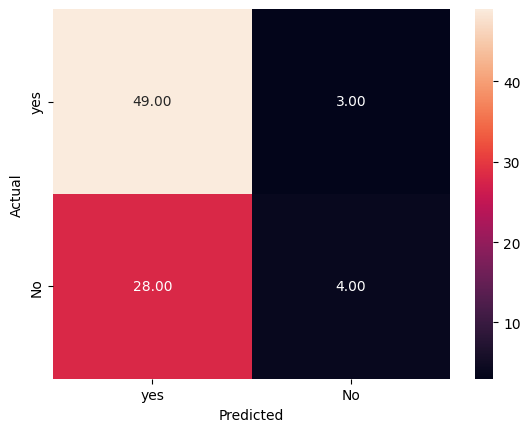

In [50]:
CM(y_test,svm_y_pred)

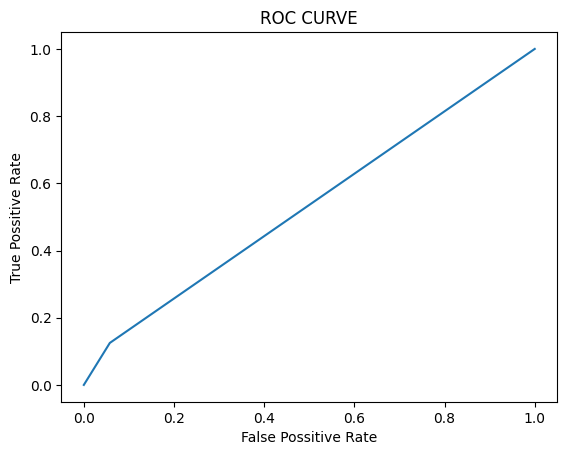

In [51]:
ROC_Curve(y_test,svm_y_pred)

# KNN ( k-nearest neighbors)

In [69]:
knn = KNeighborsClassifier(n_neighbors = 6 , metric = 'euclidean')
knn_model = knn.fit(X_train,y_train)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy is :",accuracy_knn)

KNN accuracy is : 0.6428571428571429


In [70]:
knn_y_pred = knn_model.predict(X_test)
report = classification_report(y_test,knn_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.94      0.77        52
           1       0.62      0.16      0.25        32

    accuracy                           0.64        84
   macro avg       0.63      0.55      0.51        84
weighted avg       0.64      0.64      0.57        84



<Axes: xlabel='Predicted', ylabel='Actual'>

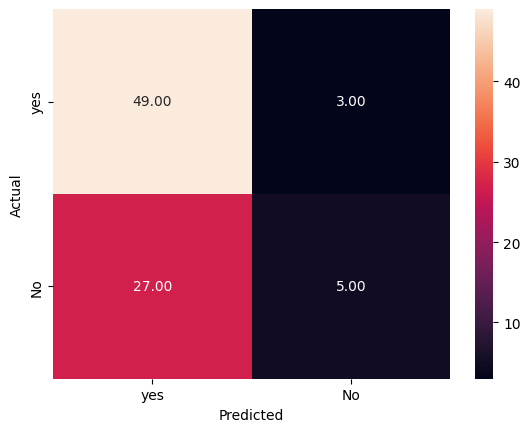

In [71]:
CM(y_test,knn_y_pred)

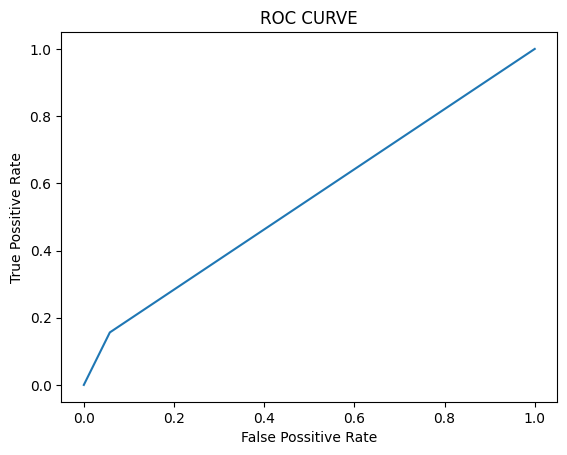

In [72]:
ROC_Curve(y_test,knn_y_pred)

# Naive Bayes

In [64]:
nb_classifier = GaussianNB()
nb_model = nb_classifier.fit(X_train, y_train)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.42857142857142855


In [65]:
nb_y_pred = nb_classifier.predict(X_test)
report = classification_report(y_test,nb_y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        52
           1       0.40      1.00      0.57        32

    accuracy                           0.43        84
   macro avg       0.70      0.54      0.36        84
weighted avg       0.77      0.43      0.31        84



<Axes: xlabel='Predicted', ylabel='Actual'>

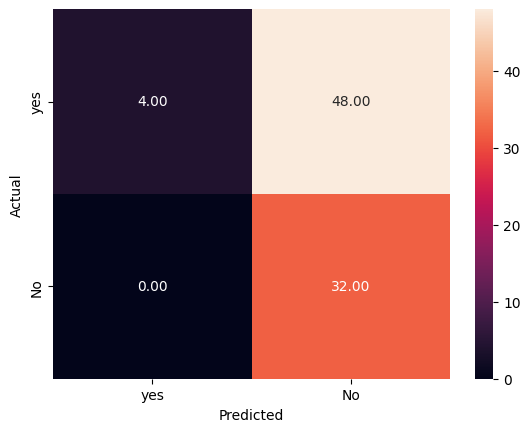

In [66]:
CM(y_test,nb_y_pred)

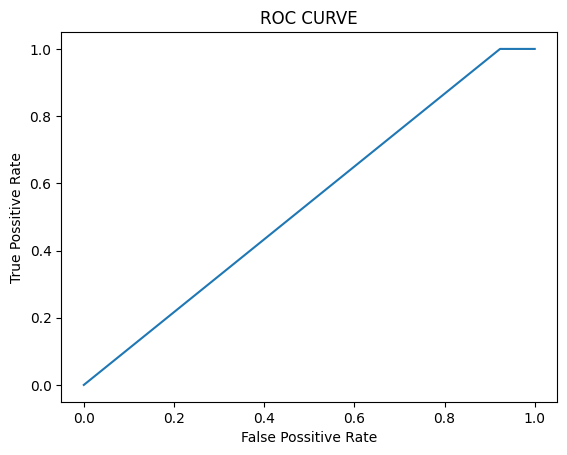

In [67]:
ROC_Curve(y_test,nb_y_pred)

# ADABOOST 

In [52]:
abc = AdaBoostClassifier(n_estimators = 100 , learning_rate = 0.1)
abc_model = abc.fit(X_train,y_train)
accuracy_abc = abc_model.score(X_test,y_test)
print("Adaboost accuracy is :",accuracy_abc)

Adaboost accuracy is : 0.7023809523809523


In [53]:
abc_y_pred = abc_model.predict(X_test)
report = classification_report(y_test,abc_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        52
           1       0.77      0.31      0.44        32

    accuracy                           0.70        84
   macro avg       0.73      0.63      0.62        84
weighted avg       0.72      0.70      0.66        84



<Axes: xlabel='Predicted', ylabel='Actual'>

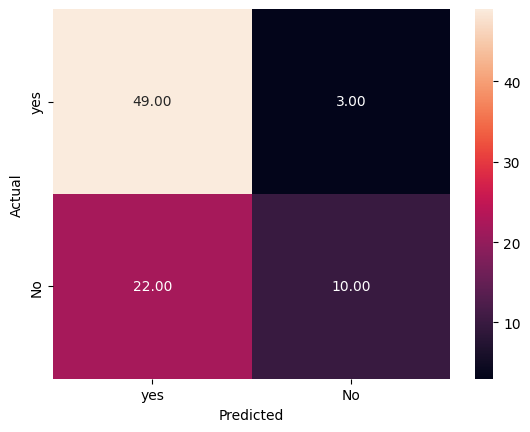

In [54]:
CM(y_test,abc_y_pred)

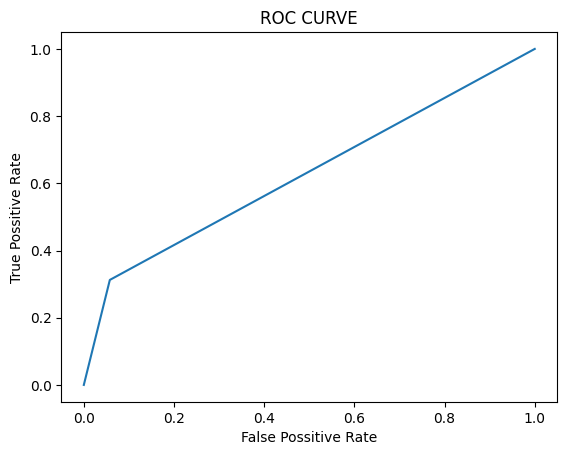

In [55]:
ROC_Curve(y_test,abc_y_pred)

# Grediant Boosting 

In [56]:
GBC = GradientBoostingClassifier()
gbc_model = GBC.fit(X_train,y_train)
accuracy_gbc = gbc_model.score(X_test,y_test)
print("Grediant Boosting accuracy is :",accuracy_gbc)

Grediant Boosting accuracy is : 0.6666666666666666


In [57]:
gbc_y_pred = gbc_model.predict(X_test)
report = classification_report(y_test,gbc_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        52
           1       0.64      0.28      0.39        32

    accuracy                           0.67        84
   macro avg       0.66      0.59      0.58        84
weighted avg       0.66      0.67      0.63        84



<Axes: xlabel='Predicted', ylabel='Actual'>

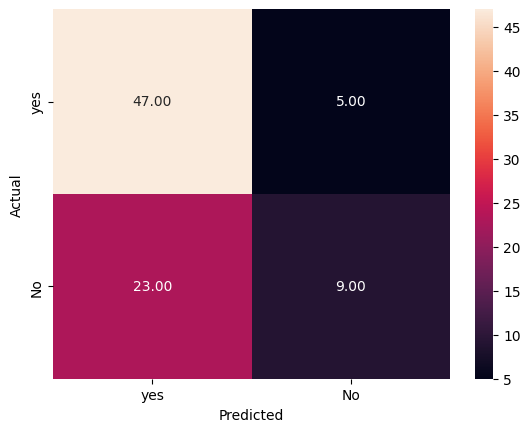

In [58]:
CM(y_test,gbc_y_pred)

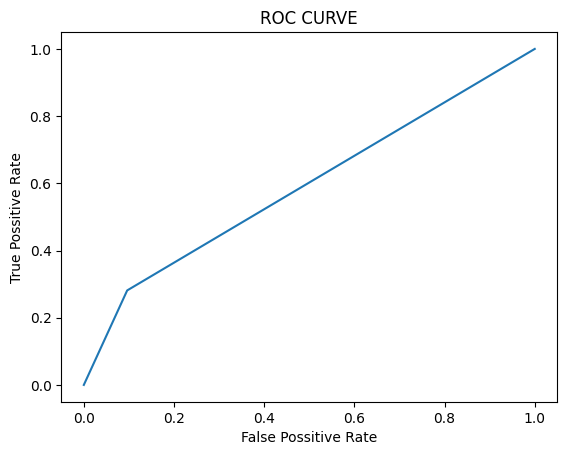

In [59]:
ROC_Curve(y_test,gbc_y_pred)

# XG BOOSTING

In [60]:
xgb = XGBClassifier(n_estimators = 200 , max_depth = 3)
xgb_model = xgb.fit(X_train,y_train)
accuracy_xgb = xgb_model.score(X_test,y_test)
print("XG Boosting accuracy is :",accuracy_xgb)

XG Boosting accuracy is : 0.6904761904761905


In [61]:
xgb_y_pred = xgb_model.predict(X_test)
report = classification_report(y_test,xgb_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        52
           1       0.67      0.38      0.48        32

    accuracy                           0.69        84
   macro avg       0.68      0.63      0.63        84
weighted avg       0.69      0.69      0.67        84



<Axes: xlabel='Predicted', ylabel='Actual'>

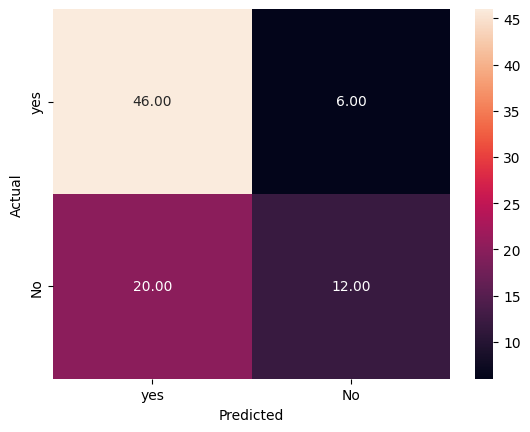

In [62]:
CM(y_test,xgb_y_pred)

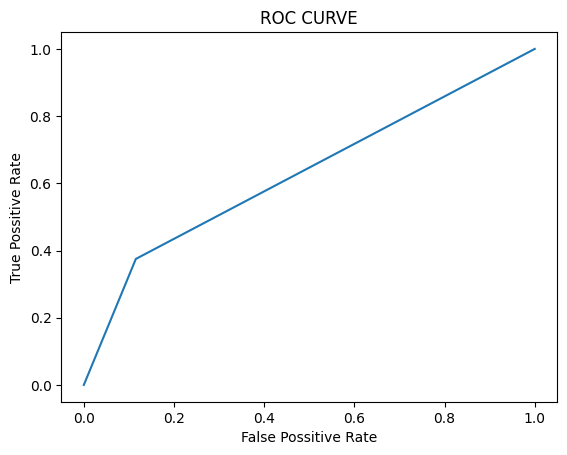

In [63]:
ROC_Curve(y_test,xgb_y_pred)